DATASET DOWNLOAD AND EXTRACT

In [1]:
import numpy as np
import tensorflow as tf
from scipy.io import loadmat
from utility import plot_confusion_matrix
import tensorflow.keras.layers as layer
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [2]:
seed = 1231829
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
from data_loader import get_data
X_data, labels = get_data()

/Users/denisderonjic/Repos/ActivityRecognition/data_loader.py:108: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return (np.array(X_data), labels)


In [4]:
print(X_data.shape)
print(labels.shape)

(761,)
(761,)


FALLING


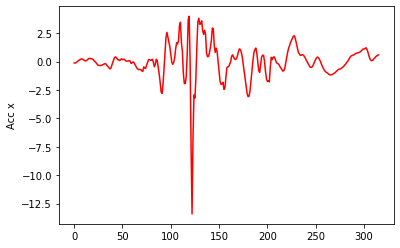

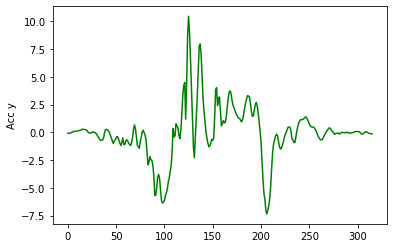

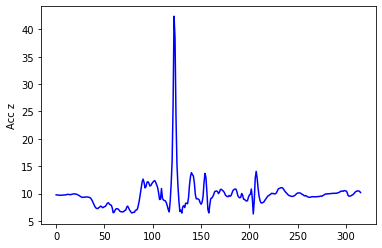

In [5]:
import matplotlib.pyplot as plt

measure = 10
print(labels[measure])
accX = X_data[measure][:, 0]
#accX = np.fft.fft(accX)
plt.plot(accX, color='r')
plt.ylabel('Acc x')
plt.show()

accY = X_data[measure][:, 1]
#accY = np.fft.fft(accY)
plt.plot(accY, color='g')
plt.ylabel('Acc y')
plt.show()

accZ = X_data[measure][:, 2]
#accZ = np.fft.fft(accZ)
plt.plot(accZ, color='b')
plt.ylabel('Acc z')
plt.show()
del accX, accY, accZ

In [6]:
from data_transformation import frame_data

X_data, y_data = frame_data(X_data, labels)

In [7]:
X_data = X_data[:,:, :6] #Dropping magnetometer

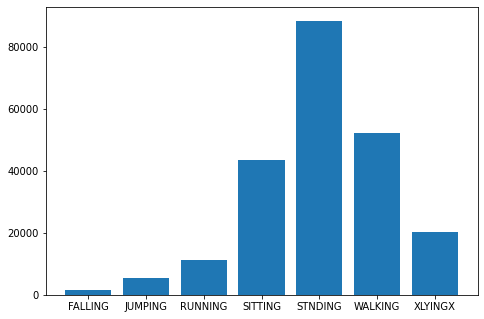

In [8]:
unique, counts = np.unique(y_data, return_counts=True)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(unique,counts)
plt.show()

In [9]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

y_data = le.fit_transform(y_data)

In [10]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

num_labels = len(le_name_mapping)
print(num_labels)

{'FALLING': 0, 'JUMPING': 1, 'RUNNING': 2, 'SITTING': 3, 'STNDING': 4, 'WALKING': 5, 'XLYINGX': 6}
7


In [11]:
import data_transformation as dt

#X_data, y_data = dt.data_augmentation(X_data, y_data, [dt.jitter])

FALLING


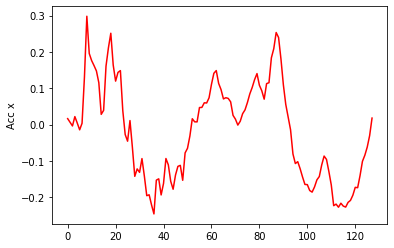

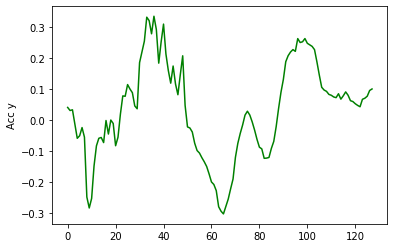

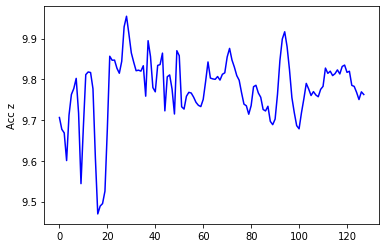

In [12]:
measure = 10
print(labels[measure])
accX = X_data[measure][:, 0]
#accX = np.fft.fft(accX)
plt.plot(accX, color='r')
plt.ylabel('Acc x')
plt.show()

accY = X_data[measure][:, 1]
#accY = np.fft.fft(accY)
plt.plot(accY, color='g')
plt.ylabel('Acc y')
plt.show()

accZ = X_data[measure][:, 2]
#accZ = np.fft.fft(accZ)
plt.plot(accZ, color='b')
plt.ylabel('Acc z')
plt.show()
del accX, accY, accZ

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=seed)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

#from sklearn.model_selection import StratifiedShuffleSplit
#X_train = []
#X_test = []
#y_train = []
#y_test = []
#split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=seed)
#for train_index, test_index in split.split(X_data, y_data):
#    X_train.append(X_data[train_index])
#    y_train.append(y_data[train_index])
#    X_test.append(X_data[test_index])
#    y_test.append(y_data[test_index])
#X_train = np.array(X_train[0])
#y_train = np.array(y_train[0])
#X_test = np.array(X_test[0])
#y_test = np.array(y_test[0])

In [14]:
#check https://stackoverflow.com/questions/59979763/cant-get-done-conv1d-with-tf-keras
#check https://stats.stackexchange.com/questions/264546/difference-between-samples-time-steps-and-features-in-neural-network
print(X_train.shape)
print(y_train.shape)

(155666, 128, 6)
(155666,)


In [15]:
#fig, axs = plt.subplots(3, 2)
#fig.set_figheight(15)
#fig.set_figwidth(15)
#axs[0, 0].plot(X_train[measure,:,0], 'tab:red')
#axs[0, 0].set_title('Real Acc x')
#axs[0, 1].plot(X_prova[measure,:,0], 'tab:red')
#axs[0, 1].set_title('Pred Acc x')
#
#axs[1, 0].plot(X_train[measure,:,1], 'tab:green')
#axs[1, 0].set_title('Real Acc y')
#axs[1, 1].plot(X_prova[measure,:,1], 'tab:green')
#axs[1, 1].set_title('Pred Acc y')
#
#axs[2, 0].plot(X_train[measure,:,2], 'tab:blue')
#axs[2, 0].set_title('Real Acc 1')
#axs[2, 1].plot(X_prova[measure,:,2], 'tab:blue')
#axs[2, 1].set_title('Pred Acc 1')

In [16]:
from data_transformation import data_normalizaion

X_train = data_normalizaion(X_train)
X_test = data_normalizaion(X_test)

2021-08-18 11:36:42.172085: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-18 11:36:42.172226: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


# Classification On FFT data

In [17]:
X_train_fft = np.fft.fft(X_train, axis=1)
X_test_fft = np.fft.fft(X_test, axis=1)

print(X_train.shape)
print(X_train_fft.shape)

(155666, 128, 6)
(155666, 128, 6)


(128,)


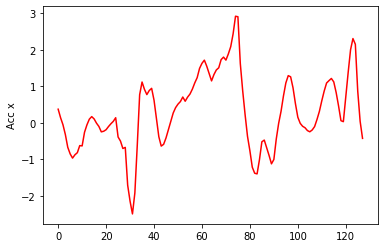

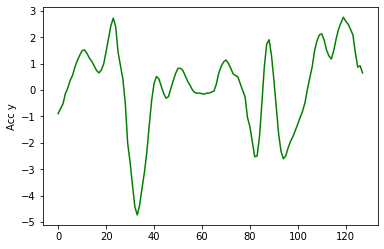

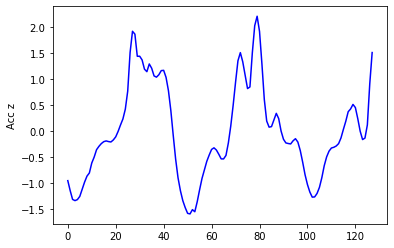

In [18]:
measure = 12
accX = X_train[measure,:,0]
print(accX.shape)
#accX = np.fft.fft(accX)
plt.plot(accX, color='r')
plt.ylabel('Acc x')
plt.show()

accY = X_train[measure,:,1]
#accY = np.fft.fft(accY)
plt.plot(accY, color='g')
plt.ylabel('Acc y')
plt.show()

accZ = X_train[measure,:,2]
#accZ = np.fft.fft(accZ)
plt.plot(accZ, color='b')
plt.ylabel('Acc z')
plt.show()

/Users/denisderonjic/miniforge3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


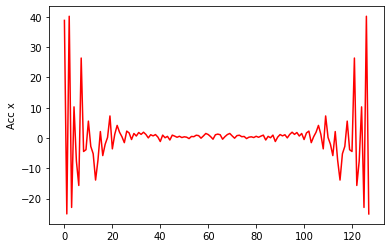

/Users/denisderonjic/miniforge3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


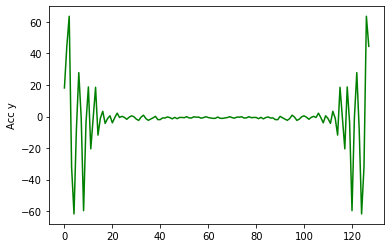

/Users/denisderonjic/miniforge3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


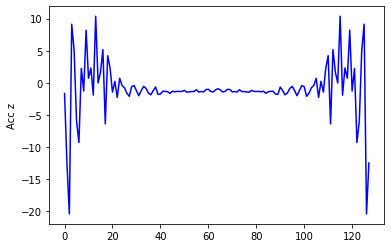

In [19]:
accX = X_train_fft[measure,:,0]
plt.plot(accX, color='r')
plt.ylabel('Acc x')
plt.show()

accY = X_train_fft[measure,:,1]
plt.plot(accY, color='g')
plt.ylabel('Acc y')
plt.show()

accZ = X_train_fft[measure,:,2]
#accZ = tf.signal.fft(accZ)
plt.plot(accZ, color='b')
plt.ylabel('Acc z')
plt.show()

In [20]:
#X_train_fft = data_normalizaion(X_train_fft).astype(np.float32)
#X_test_fft = data_normalizaion(X_test_fft).astype(np.float32)z

In [21]:
X_train_fft = X_train_fft.astype(np.float32)
X_test_fft = X_test_fft.astype(np.float32)

/var/folders/yk/z_nrjlnn1l1d2pdf_3sly5k40000gn/T/ipykernel_2590/3583013230.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  X_train_fft = X_train_fft.astype(np.float32)
/var/folders/yk/z_nrjlnn1l1d2pdf_3sly5k40000gn/T/ipykernel_2590/3583013230.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  X_test_fft = X_test_fft.astype(np.float32)


In [23]:
from models import ConvolutionalClassificationNN

loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam()

classificationModel_fft = ConvolutionalClassificationNN(num_labels)
classificationModel_fft.compile(optimizer=optimizer, loss=loss_object, metrics=['acc'])

In [24]:
callback = tf.keras.callbacks.EarlyStopping(monitor='acc', patience=5)
history = classificationModel_fft.fit(X_train_fft, y_train,
                epochs=5,
                shuffle=True,
                batch_size=64,
                validation_split=0.2,
                callbacks=[callback])

Epoch 1/5
1946/1946 [==============================] - 67s 34ms/step - loss: 0.7636 - acc: 0.7122 - val_loss: 0.5562 - val_acc: 0.7873
Epoch 2/5
1946/1946 [==============================] - 66s 34ms/step - loss: 0.5471 - acc: 0.7976 - val_loss: 0.4565 - val_acc: 0.8304
Epoch 3/5
1946/1946 [==============================] - 69s 36ms/step - loss: 0.4622 - acc: 0.8322 - val_loss: 0.4157 - val_acc: 0.8460
Epoch 4/5
1946/1946 [==============================] - 70s 36ms/step - loss: 0.4138 - acc: 0.8517 - val_loss: 0.3745 - val_acc: 0.8646
Epoch 5/5
1946/1946 [==============================] - 70s 36ms/step - loss: 0.3802 - acc: 0.8645 - val_loss: 0.3749 - val_acc: 0.8589


In [25]:
from sklearn.metrics import confusion_matrix

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_fft, y_test)).batch(1000)
tot_acc = []
y_pred_tot = []
for (data, label) in test_dataset:
  output = classificationModel_fft(data)
  y_pred = np.argmax(output, axis=1)
  for pred in y_pred:
    y_pred_tot.append(pred)
  matrix = confusion_matrix(label, y_pred)
  accuracy = np.trace(matrix) / np.sum(matrix)
  tot_acc.append(accuracy)
print(np.mean(tot_acc))

0.8613453710468635


In [27]:
def plot_confusion_matrix(predictions, labels, target_names):

  import matplotlib.cm

  '''
  ============================
  Internal function definition
  ============================
  '''
  def _confusion_matrix(cm,
                            target_names,
                            title='Confusion matrix',
                            cmap=None):
      import itertools

      accuracy = np.trace(cm) / float(np.sum(cm))
      misclass = 1 - accuracy

      if cmap is None:
          cmap = plt.get_cmap('Reds')
      
      cm = cm.astype('float')
      for i in range(len(cm)):
        cm[i] /= float(np.sum(cm[i]))

      plt.figure(figsize=(16, 12))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()

      if target_names is not None:
          tick_marks = np.arange(len(target_names))
          plt.xticks(tick_marks, target_names, rotation=45)
          plt.yticks(tick_marks, target_names)


      thresh = cm.max() / 2
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                      horizontalalignment="center",
                      color="white" if cm[i, j] > thresh else "black")
              


      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
      plt.show()
  '''
  ===================================
  End of internal function definition
  ===================================
  '''

  from sklearn.metrics import confusion_matrix

  conf_mat = confusion_matrix(predictions, labels)
  _confusion_matrix(conf_mat, target_names=target_names)

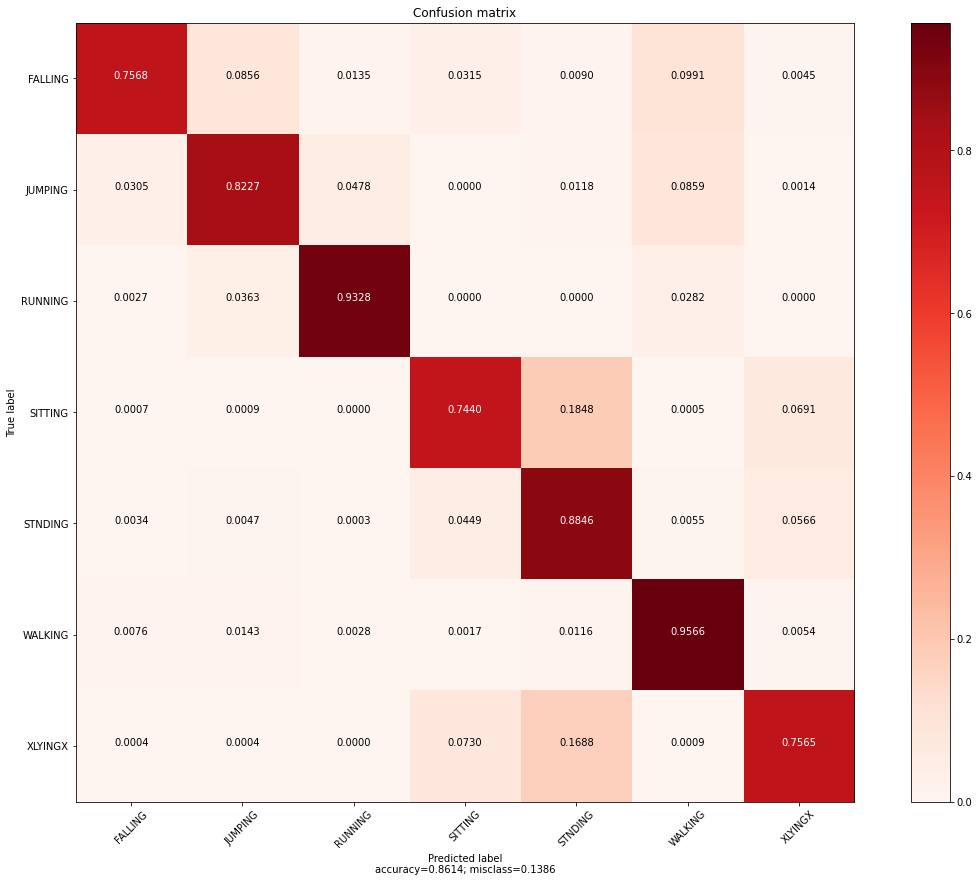

In [28]:
plot_confusion_matrix(y_pred_tot, y_test, target_names=le.classes_)